In [12]:
import librosa
import scipy
import statistics
from skimage import data, color
import math
import librosa.display
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from os import path
from pydub import AudioSegment
import scipy as sp
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats




def spectro_mesh(archivo, nfft, hop, win_length,cut,eliminar):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    #y = y[1:round(len(y)/15)]
        
    
    S = np.abs(librosa.stft(y, center = False,n_fft = nfft, hop_length = hop, win_length = win_length ))
    S = librosa.amplitude_to_db(S,ref=np.max)
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -cut:
                S[row][element] = -80
    S = np.delete(S, slice(eliminar,S.shape[0]),0)
    return(S)
#Python3
import sys
import threading
from collections import deque
import heapq
import os
class vertice_dijkstra:
    def __init__(self,vertice,previo,distancia):
        self.previo = previo
        self.distancia = distancia
        self.vertice = vertice
        self.cambiado = False
    def __lt__(self,other):
        
        return(self.distancia < other.distancia)
    def __str__(self):
        return("vertice: %s, distancia: %s, previo: %s, visitado: %s"% (str(self.vertice),str(self.distancia),str(self.previo),str(self.cambiado)))

class vertex:
    def __init__(self):
        self.postvisit = None
        self.previsit = None
        self.visited = False
        self.level = -1
        self.distance = float("inf")
        self.prev = []
class order:
    def __init__(self):
        
        self.clock = 0
    def previsit(self):
        self.clock += 1
        return(self.clock)
    def postvisit(self):
        self.clock += 1
        return(self.clock)

class graph:
    def __init__(self,vertexs):
        self.ladjacent = [[] for x in range(0,vertexs)]
        self.vertices = {x:vertex() for x in range(1,vertexs+1)}
        self.circular = 0
    def addedge(self,v1,v2):
        if v2  not in self.ladjacent[v1-1]:
            self.ladjacent[v1-1].append(v2)
        if v1  not in self.ladjacent[v2-1]:
            self.ladjacent[v2-1].append(v1)
    def explore(self,vertice):
        self.vertices[vertice].visited = 1

        for x in range(0,len(self.ladjacent[vertice-1])):
            if self.vertices[self.ladjacent[vertice-1][x]].visited == False:
                self.explore(self.ladjacent[vertice-1][x])
    def areachablefromb(self,a,b):
        self.explore(a)
        return(self.vertices[b].visited)
    def addedge_direct(self,v1,v2):
        if v2  not in self.ladjacent[v1-1]:
            self.ladjacent[v1-1].append(v2)
    def explore2(self,vertice,clock):
        n = 0
        self.vertices[vertice].visited = True
        self.vertices[vertice].previsit = clock.previsit()
        for x in range(0,len(self.ladjacent[vertice-1])):
            if self.vertices[self.ladjacent[vertice-1][x]].visited == False:
                self.explore2(self.ladjacent[vertice-1][x],clock)
            else:
                if self.vertices[self.ladjacent[vertice-1][x]].postvisit == None and self.vertices[self.ladjacent[vertice-1][x]].previsit != None:
                    self.circular = 1
                    
        self.vertices[vertice].postvisit = clock.postvisit()
    def addedge_direct_weigthed(self,v1,v2,edge):
        if v2  not in self.ladjacent[v1-1]:
            self.ladjacent[v1-1].append((v2,edge))
          

    def cicle(self):
        clock = order()
        for x in range(1,len(self.ladjacent)+1):
            if self.vertices[x].visited == False:
                self.explore2(x,clock)
                if self.circular == 1:
                    break
    def sorting(self):
        clock = order()
        vertes = [y for x, y in sorted(zip(self.ladjacent,list(range(1,len(self.ladjacent)+1))), key=lambda pair: len(pair[0]),reverse=True)]
        for x in vertes:
            if self.vertices[x].visited == False:
                self.explore2(x,clock)    
        vertePost = [[x,self.vertices[x].postvisit] for x in  self.vertices.keys()]
        
        vertePost.sort(key=lambda x: x[1],reverse=True)

        
        return([x[0] for x in vertePost])
    
    def distance(self,partida,llegada):
        q = deque()
        q.append(partida)
        self.vertices[partida].level = 0
        while len(q) != 0:
            u = q.popleft()
            for x in self.ladjacent[u-1]:
                if self.vertices[x].level == -1:
                    q.append(x)
                    self.vertices[x].level = self.vertices[u].level + 1
        return(self.vertices[llegada].level)

    def dijkstra(self, partida):
        referencias = {}
        
        for x in self.vertices.keys():
            if x == partida:
                referencias[x] = vertice_dijkstra(x,None,[0,x])
            else:
                referencias[x] = vertice_dijkstra(x,None,[float("inf"),x])
        H = [referencias[x] for x in referencias.keys()]
        heapq.heapify(H)
        while len(H) != 0:
            
            u = heapq.heappop(H)
            for v in self.ladjacent[u.vertice-1]:
                if referencias[v[0]].distancia[0] > referencias[u.vertice].distancia[0] + v[1]:
                    if len(H) != 0:
                        referencias[v[0]].distancia[0] = -1
                        heapq.heappush(H,vertice_dijkstra(0,0,[-1,0]))
                        heapq.heappop(H)
                        heapq.heappop(H)
                        referencias[v[0]].distancia[0] = referencias[u.vertice].distancia[0] + v[1]
                        referencias[v[0]].previo = u.vertice
                        heapq.heappush(H,referencias[v[0]])
                    else:
                        referencias[v[0]].distancia[0] = referencias[u.vertice].distancia[0] + v[1]
                        referencias[v[0]].previo = u.vertice

                    
        return(referencias)

    def dijkstra1(self, partida):
            referencias = {}
            
            for x in self.vertices.keys():
                if x == partida:
                    referencias[x] = vertice_dijkstra(x,None,[0,x])
                else:
                    referencias[x] = vertice_dijkstra(x,None,[float("inf"),x])
            H = [referencias[x] for x in referencias.keys()]
            heapq.heapify(H)
            while len(H) != 0:
                p = 0
                while p == 0:
                    
                    u = heapq.heappop(H)
                    if len(H) == 0:
                        p = 1
                    if u.cambiado == False:
                        p = 1
                    
                
                for v in self.ladjacent[u.vertice-1]:
                    if referencias[v[0]].distancia[0] > referencias[u.vertice].distancia[0] + v[1]:
                        referencias[v[0]].distancia[0] = referencias[u.vertice].distancia[0] + v[1]
                        referencias[v[0]].previo = u.vertice
                        referencias[v[0]].cambiado = False
                        t = vertice_dijkstra(referencias[v[0]].vertice,referencias[v[0]].previo,referencias[v[0]].distancia)
                        heapq.heappush(H,t)
                        referencias[v[0]].cambiado = True
                        
            return(referencias)

def image_to_graph( mesh,xx,yy):
    counter = 0
    start_stop = []
    graph_to_mesh = {}
    for y in range(0,mesh.shape[0],yy):
        control = 0
        start_c_p = []
        for x in range(0,mesh.shape[1],xx):
            #x, y, z
            counter += 1
            if control == 0:
                start_c_p.append(counter)
                control = 1
                
            graph_to_mesh[counter] = [x, y, (80+ mesh[y][x])]
            
        start_c_p.append(counter)
        start_stop.append(start_c_p)
    y = len(list(range(0,mesh.shape[0],yy)))
    x = len(list(range(0,mesh.shape[1],xx)))
    print(len(graph_to_mesh))
    print(len(start_stop))
    grafo = graph(counter)
    for u in graph_to_mesh.keys():
        #siguiente
        if ((u + 1) % x != 0) and (u + 1 <= counter):
            d = np.sqrt(  ((graph_to_mesh[u+1][0]-graph_to_mesh[u][0])**2) + ((graph_to_mesh[u+1][1]-graph_to_mesh[u][1])**2) + ((graph_to_mesh[u+1][2]-graph_to_mesh[u][2])**2) )
            grafo.addedge_direct_weigthed(u,u+1, d)
        
        #abajo
        if (u - x) > 0:
            d = np.sqrt(  ((graph_to_mesh[u-x][0]-graph_to_mesh[u][0])**2) + ((graph_to_mesh[u-x][1]-graph_to_mesh[u][1])**2) + ((graph_to_mesh[u-x][2]-graph_to_mesh[u][2])**2) )
            grafo.addedge_direct_weigthed(u,u-x, d)
        #arriba
        if (u + x) <= counter:
            d = np.sqrt(  ((graph_to_mesh[u+x][0]-graph_to_mesh[u][0])**2) + ((graph_to_mesh[u+x][1]-graph_to_mesh[u][1])**2) + ((graph_to_mesh[u+x][2]-graph_to_mesh[u][2])**2))
            grafo.addedge_direct_weigthed(u,u+x, d)
        """ 
        #siguiente_arriba
        if ((u + 1 + x) % x != 0) and (u + 1 + x <= counter) and ((u + x + 1) <= counter):
            d = np.sqrt(  ((graph_to_mesh[u+x+1][0]-graph_to_mesh[u][0])**2) + ((graph_to_mesh[u+x+1][1]-graph_to_mesh[u][1])**2) + ((graph_to_mesh[u+x+1][2]-graph_to_mesh[u][2])**2) )
            grafo.addedge_direct_weigthed(u,u+x+1, d)
            
        #Siguiente_abajo 
        if ((u + 1 - x) % x != 0) and (u + 1 -x <= counter) and ((u - x + 1) > 0):
            d = np.sqrt(  ((graph_to_mesh[u-x+1][0]-graph_to_mesh[u][0])**2) + ((graph_to_mesh[u-x+1][1]-graph_to_mesh[u][1])**2) + ((graph_to_mesh[u-x+1][2]-graph_to_mesh[u][2])**2) )
            grafo.addedge_direct_weigthed(u,u-x+1, d)
        """

    X = []
    Y = []
    plot_y = [0 for x in range(mesh.shape[0])]
    value_to_posicion = {}
    counter = 0
    for linea in start_stop:
        j = grafo.dijkstra1(linea[0])
        posterior = j[linea[1]-1].previo
        while True:
            posterior = j[posterior].previo
            if posterior == None:
                break
            else:
                X.append( graph_to_mesh[posterior][0])
                Y.append( graph_to_mesh[posterior][1])
                plot_y[graph_to_mesh[posterior][1]] += 1
                
                
                
    value_to_posicion = {plot_y[x]:x for x in range(mesh.shape[0])}
    plot_y_sin_ceros = []
    for x in plot_y:
        if x != 0:
            plot_y_sin_ceros.append(x)
    n = len(list(range(0,mesh.shape[0],yy)))
    for x in range(len(plot_y_sin_ceros)-1):
        if plot_y_sin_ceros[x+1] > plot_y_sin_ceros[x] and plot_y_sin_ceros[x+1] > n:
            res = value_to_posicion[plot_y_sin_ceros[x+1]]
            break
    
    mesh = np.delete(mesh, slice(res,mesh.shape[0]),0)           
                
                
                
    plt.figure(figsize = (30,30))
    #plt.scatter(X, Y, c="r", alpha=0.3)
    plt.imshow(mesh,origin="lower")
    plt.show()
    return(mesh)
    
    
def silabation(mesh):
    
    plot_x = [0 for _ in range(mesh.shape[1])]
    
    for x in range(mesh.shape[1]):
        
        for y in range(mesh.shape[0]):
            if mesh[y][x] == -80 and y > 5:
                break
            else:
                mesh[y][x] = -80
    
    for x in range(mesh.shape[1]):
        for y in range(mesh.shape[0]):
            if mesh[y][x] != -80:
                plot_x[x] += 1
    
    
            
    
    
    
    plt.figure(figsize = (30,30))
    
    
    
    plt.plot(plot_x)
           
            




    

def spectro_matplot(archivo, nfft, hop, win_length, off, dur):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav",offset=off, duration=dur)
    
   
    
        
    
    S = np.abs(librosa.stft(y, center = False,n_fft = nfft, hop_length = hop, win_length = win_length ))
    S = librosa.amplitude_to_db(S,ref=np.max)
    
    plt.figure(figsize = (30,30))
    plt.imshow(S,origin="lower")
    plt.show()
    
    
        
    





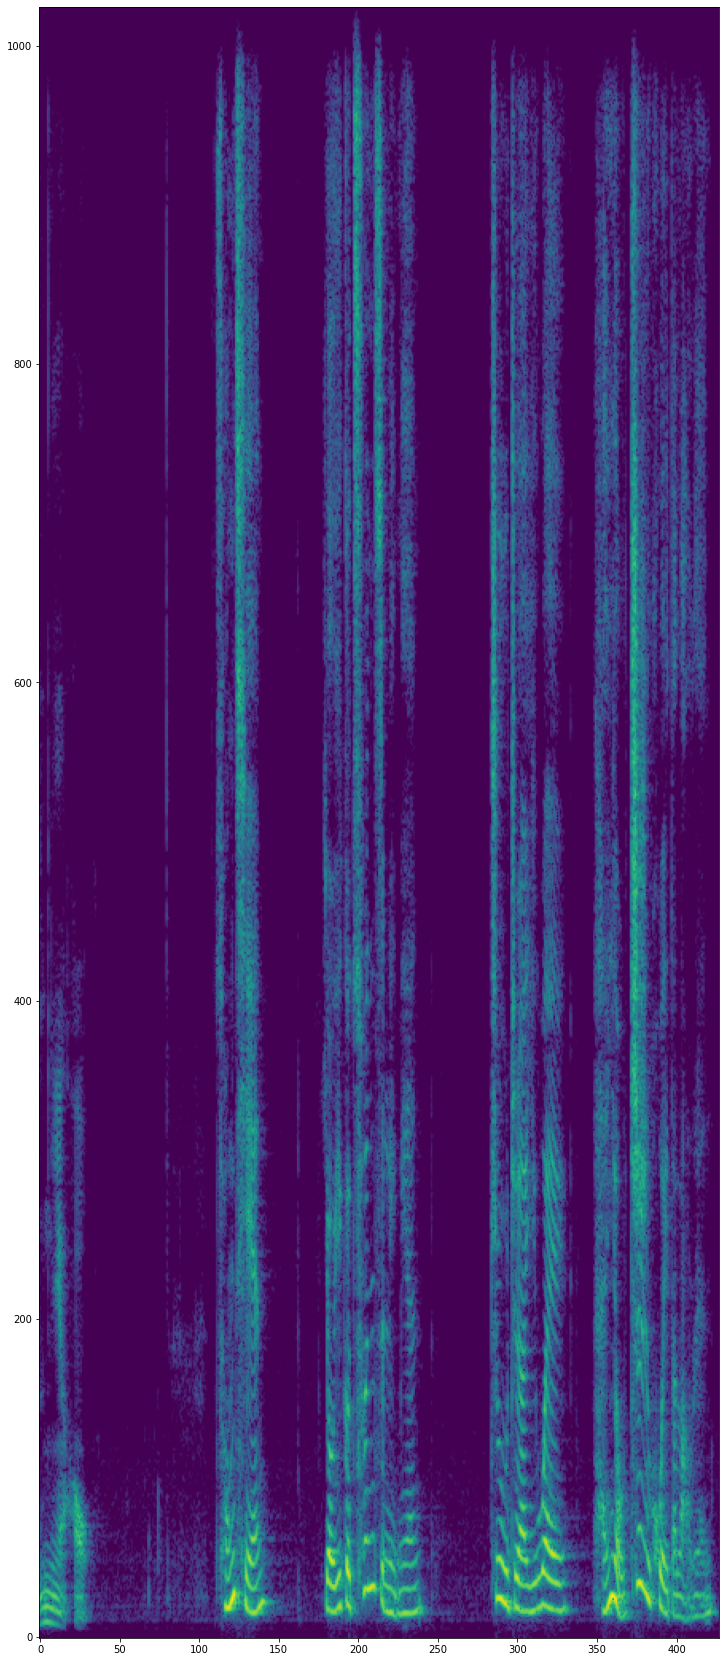

In [17]:
spectro_matplot("2.1.35A.mp3", 2048, 512, 1500, off = 69, dur=10)


In [5]:
#spectro_matplot("2.1.35A.mp3", 2048, 512, 1500)
sonido = spectro_mesh("senlin.mp3", 2048, 512, 1500,cut=25,eliminar=1000)

image_to_graph(sonido,xx=3,yy=30)


544
34


UnboundLocalError: local variable 'res' referenced before assignment

In [ ]:
src = "01 (1).mp3"
dst = "test.wav"

    # convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

import librosa
y, sr = librosa.load("test.wav",duration=5)
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)
import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [ ]:
src = "CHIFND1_0902.mp3"
dst = "test.wav"

    # convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")
y, sr = librosa.load("test.wav")
import librosa
y, sr = librosa.load("test.wav")

import matplotlib.pyplot as plt


wav_data = librosa.resample(y,sr,10000);
fs = 10000
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav_data)), ref=np.max)
f0, voiced_flag, voiced_probs = librosa.pyin(wav_data, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [ ]:
y, sr = librosa.load("test.wav")
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=208,
                                    fmax=3000)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')

In [ ]:
plt.imshow(S_dB)